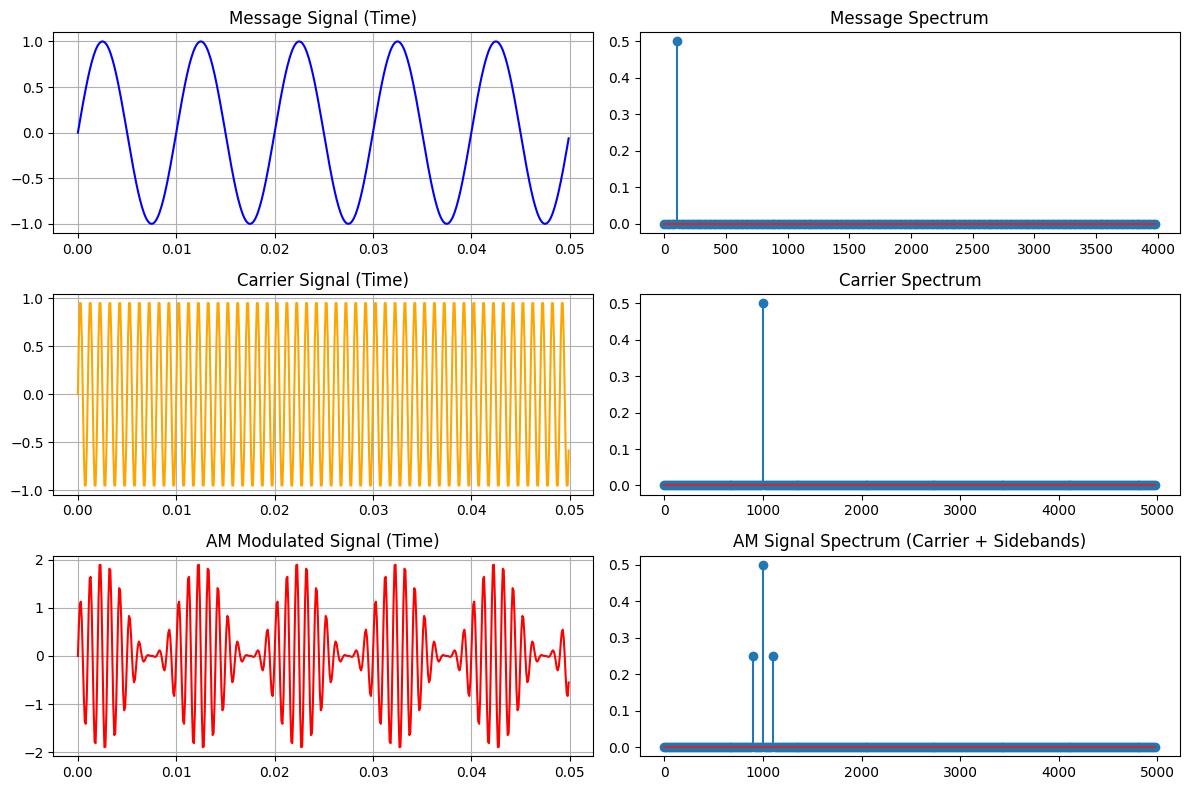

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 10000                     # Sampling frequency (Hz)
t = np.arange(0, 0.05, 1/fs)   # Time vector (50ms duration)

# 1. Message Signal (Low Frequency)
fm = 100
m_t = np.sin(2 * np.pi * fm * t)

# 2. Carrier Signal (High Frequency)
fc = 1000
c_t = np.sin(2 * np.pi * fc * t)

# 3. AM Modulation (with DC offset of 1)
ka = 1.0                       # Modulation index
s_t = (1 + ka * m_t) * c_t

# Function to calculate Frequency Domain (FFT)
def get_fft(signal, fs):
    n = len(signal)
    freq = np.fft.fftfreq(n, 1/fs)
    fft_mag = np.abs(np.fft.fft(signal) / n)
    return freq[:n//2], fft_mag[:n//2]

# Plotting
plt.figure(figsize=(12, 8))

# Time Domain Plots
plt.subplot(3, 2, 1)
plt.plot(t, m_t, color='blue')
plt.title("Message Signal (Time)")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(t, c_t, color='orange')
plt.title("Carrier Signal (Time)")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(t, s_t, color='red')
plt.title("AM Modulated Signal (Time)")
plt.grid(True)

# Frequency Domain Plots
f, mag_m = get_fft(m_t, fs)
plt.subplot(3, 2, 2)
plt.stem(f[:200], mag_m[:200]) # Zoomed in
plt.title("Message Spectrum")

f, mag_c = get_fft(c_t, fs)
plt.subplot(3, 2, 4)
plt.stem(f[:1500], mag_c[:1500])
plt.title("Carrier Spectrum")

f, mag_s = get_fft(s_t, fs)
plt.subplot(3, 2, 6)
plt.stem(f[:1500], mag_s[:1500])
plt.title("AM Signal Spectrum (Carrier + Sidebands)")

plt.tight_layout()
plt.show()